In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install tensorflow-gpu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:

train_path = '/content/drive/My Drive/archive (2)/brain_tumor_dataset'
valid_path = '/content/drive/My Drive/archive (2)/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset/*')

In [ ]:
folders

['/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset/no',
 '/content/drive/MyDrive/PATH_TO_OUTPUT/brain_tumor_dataset/yes']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
Prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=inception.input, outputs=Prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/My Drive/archive (2)/brain_tumor_dataset',
                                               target_size = (224,224),
                                               batch_size=8,
                                               class_mode='categorical')

Found 207 images belonging to 2 classes.


In [ ]:
test_set=test_datagen.flow_from_directory('/content/drive/My Drive/archive (2)/test',
                                               target_size = (224,224),
                                               batch_size=8,
                                               class_mode='categorical')

Found 46 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
    training_set,
    validation_data=(test_set),
    epochs=8,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
26/26 [==============================] - 24s 919ms/step - loss: 1.6509 - accuracy: 0.8744 - val_loss: 1.6546 - val_accuracy: 0.7609
Epoch 2/8
26/26 [==============================] - 24s 917ms/step - loss: 0.7095 - accuracy: 0.9034 - val_loss: 1.4685 - val_accuracy: 0.9348
Epoch 3/8
26/26 [==============================] - 23s 896ms/step - loss: 0.5248 - accuracy: 0.9179 - val_loss: 1.3853 - val_accuracy: 0.8478
Epoch 4/8
26/26 [==============================] - 23s 900ms/step - loss: 0.6713 - accuracy: 0.9179 - val_loss: 1.5085 - val_accuracy: 0.8696
Epoch 5/8
26/26 [==============================] - 23s 888ms/step - loss: 0.7428 - accuracy: 0.9179 - val_loss: 1.6342 - val_accuracy: 0.8478
Epoch 6/8
26/26 [==============================] - 23s 888ms/step - loss: 0.5946 - accuracy: 0.9227 - val_loss: 2.1294 - val_accuracy: 0.9130
Epoch 7/8
26/26 [==============================] - 23s 874ms/step - loss: 0.5869 - accuracy: 0.9517 - val_loss: 1.5739 - val_accuracy: 0.8696
Epoch 

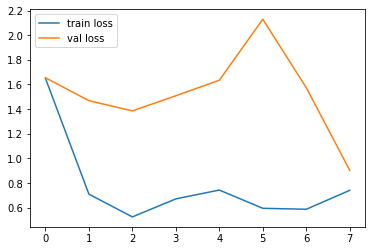

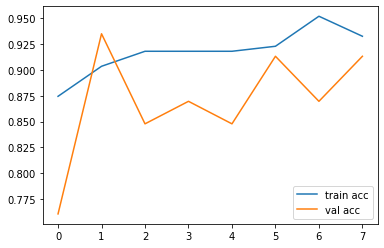

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[2.1989610e-11, 1.0000000e+00],
       [6.3064829e-07, 9.9999940e-01],
       [1.0000000e+00, 4.9009596e-09],
       [6.8319417e-13, 1.0000000e+00],
       [8.1050971e-11, 1.0000000e+00],
       [9.0533072e-01, 9.4669282e-02],
       [1.0000000e+00, 7.9712861e-11],
       [1.3015530e-21, 1.0000000e+00],
       [1.6546030e-11, 1.0000000e+00],
       [3.1278393e-08, 1.0000000e+00],
       [1.0000000e+00, 1.2143028e-11],
       [6.8527214e-07, 9.9999928e-01],
       [1.0000000e+00, 1.1848734e-11],
       [1.0000000e+00, 2.9425701e-10],
       [1.7078215e-20, 1.0000000e+00],
       [1.0622701e-10, 1.0000000e+00],
       [9.7456384e-01, 2.5436124e-02],
       [1.0000000e+00, 6.8787715e-15],
       [1.0000000e+00, 1.2143028e-11],
       [2.5222849e-07, 9.9999976e-01],
       [1.0000000e+00, 5.2848137e-14],
       [1.0000000e+00, 1.4562688e-11],
       [5.2143012e-08, 1.0000000e+00],
       [1.0000000e+00, 2.2206421e-11],
       [3.7703547e-12, 1.0000000e+00],
       [5.0882125e-11, 1.

In [ ]:
import numpy as np
import pandas as pd
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0])

In [ ]:
for i in y_pred:
  if i==1:
    print("no")
  else:
    print("yes")

no
no
yes
no
no
yes
yes
no
no
no
yes
no
yes
yes
no
no
yes
yes
yes
no
yes
yes
no
yes
no
no
no
no
no
yes
no
yes
no
yes
yes
yes
no
yes
no
yes
yes
no
no
yes
yes
yes


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=tf.lite.TFLiteConverter.from_keras_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Y45.JPG',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       ...,

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]],

       [[11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.],
        ...,
        [11., 11., 11.],
        [11., 11., 11.],
        [11., 11., 11.]]

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model=load_model('model_resnet50.h5')

OSError: ignored